Importing City of Buffalo 311 Calls

In [ ]:
import pandas as pd

df = pd.read_csv("https://data.buffalony.gov/resource/whkc-e5vr.csv")
pd.set_option('display.max_columns', None)
df.head()

,case_reference,open_date,closed_date,status,subject,reason,type,object_type,address_number,address_line_1,address_line_2,city,state,zip_code,property_id,location,latitude,longitude,council_district,council_district_2011,police_district,census_tract,census_block_group,census_block,neighborhood,x_coordinate,y_coordinate,census_tract_2010,census_block_group_2010,census_block_2010,tractce20,geoid20_tract,geoid20_blockgroup,geoid20_block
0,514722,2010-07-19T12:06:00.000,2010-07-19T14:15:00.000,Closed,Dept of Public Works,Streets,Sweeper (Req_Serv),Street,NaN,RAMONA,NaN,Buffalo,NY,UNKNOWN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
1,1000802971,2018-02-12T06:47:00.000,2018-02-12T10:33:00.000,Closed,Buffalo Police Department,Police,Police Issue (Req_Serv),Street,NaN,Brinkman Ave,NaN,Buffalo,NY,UNKNOWN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
2,541218,2011-01-11T09:12:00.000,2011-01-26T10:01:00.000,Closed,Utilities,National Grid,Streetlights (Req_Serv),Street,NaN,CLIFF,NaN,Buffalo,NY,UNKNOWN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
3,1000708750,2017-07-10T11:36:00.000,2017-07-10T14:27:00.000,Closed,Dept of Public Works,Streets,Sweeper (Req_Serv),Street,NaN,SPRING,NaN,Buffalo,NY,UNKNOWN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
4,1000892866,2018-08-18T15:44:00.000,2018-08-20T22:00:00.000,Closed,Dept of Public Works,Forestry,Tree Planting Request (Req_Serv),Property,NaN,NaN,NaN,Buffalo,NY,UNKNOWN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN


In [ ]:
df['open_date'] = pd.to_datetime(df['open_date'])
df['closed_date'] = pd.to_datetime(df['closed_date'])
df.dtypes

case_reference                      int64
open_date                  datetime64[ns]
closed_date                datetime64[ns]
status                             object
subject                            object
reason                             object
type                               object
object_type                        object
address_number                    float64
address_line_1                     object
address_line_2                    float64
city                               object
state                              object
zip_code                           object
property_id                        object
location                           object
latitude                          float64
longitude                         float64
council_district                   object
council_district_2011              object
police_district                    object
census_tract                       object
census_block_group                 object
census_block                      

### Question:
It looks like status, subject, reason, type and object type might be interesting categorical variables
- Which of these can be described by a limited number of categories?  
- Which are not described easily as a limited number of outcomes?

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns].describe().T

,count,unique,top,freq
status,1000,2,Closed,997
subject,1000,9,DPIS,631
reason,1000,17,Housing,631
type,1000,51,Housing Violations (Req_Serv),608
object_type,1000,3,Property,777
address_line_1,952,470,HOPKINS,26
city,1000,1,Buffalo,1000
state,1000,2,NY,984
zip_code,1000,19,UNKNOWN,233
property_id,764,726,112.50-2-17,3


### Answer:
- The best limited number categories to work with is status, subject, reason, and object
- Type made it difficult to work with its 51 unique values

### Task:
Figure out which of the outcomes fit into a limited number of categories, and then produce some graphs explaining how they are related to council district, police district, neighborhood.

This graph did appear more detailed with more values data in the open status. However they updated api at the end of the day and a lot of the open status where changed to closed.

Text(0.5, 1.0, 'Stacked Bar Plot of Two Categorical Variables')

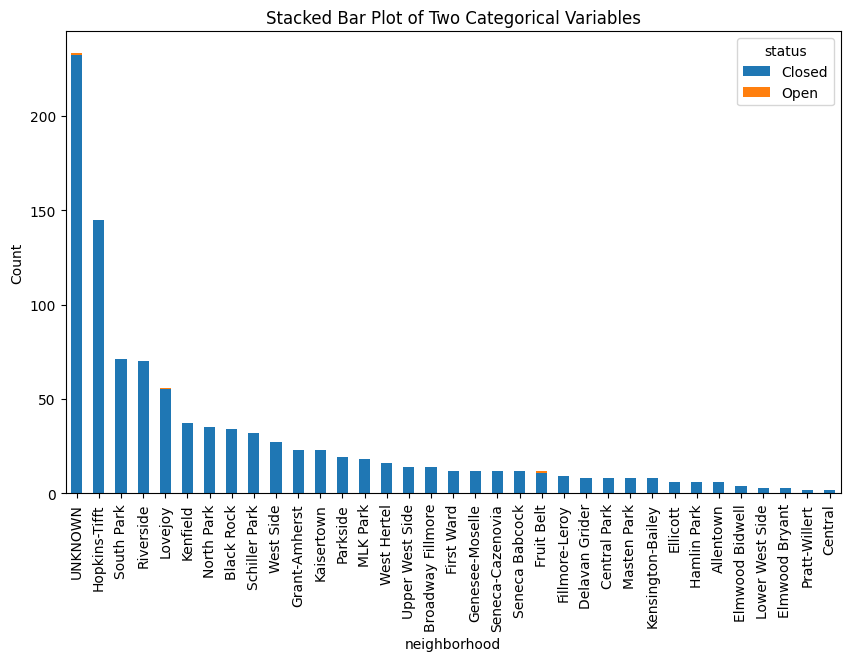

In [ ]:
import matplotlib.pyplot as plt

grouped_data = df.groupby(['neighborhood', 'status']).size().unstack(fill_value=0)
grouped_data = grouped_data.loc[grouped_data.sum(axis=1).sort_values(ascending=False).index]
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('neighborhood')
plt.ylabel('Count')
plt.title('Stacked Bar Plot')


The graph displays the reputation of each neighborhood, depicting the total number of 311 phone calls aggregated as a stacked data plot, showing the status of closed and open cases. From this graph, we can infer that Hopkins-Tiff, South Park, and Riverside are the top three neighborhoods with the highest number of 311 calls.

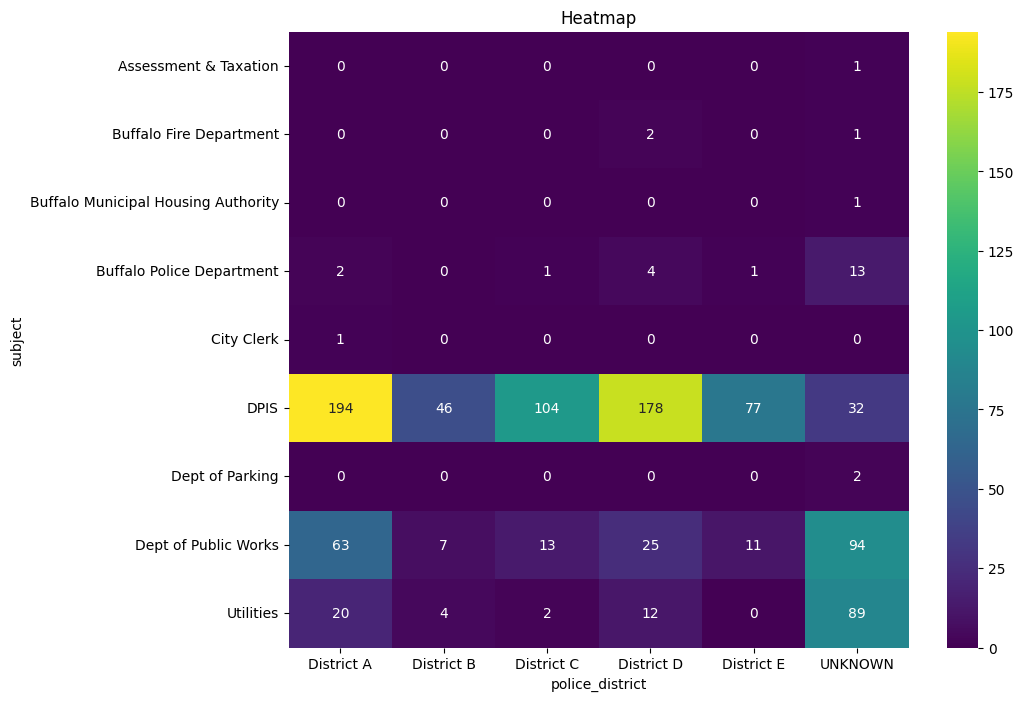

In [ ]:
import seaborn as sns

cross_tab = pd.crosstab(df['subject'], df['police_district'])

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='viridis', fmt='d')
plt.title('Heatmap')
plt.xlabel('police_district')
plt.ylabel('subject')
plt.show()


This heat map indicates that among the police districts, District A and District D receive the highest number of 311 calls. Specifically, it highlights that the highest subject type and district combination is DPIS in District A, followed by DPIS in District D.

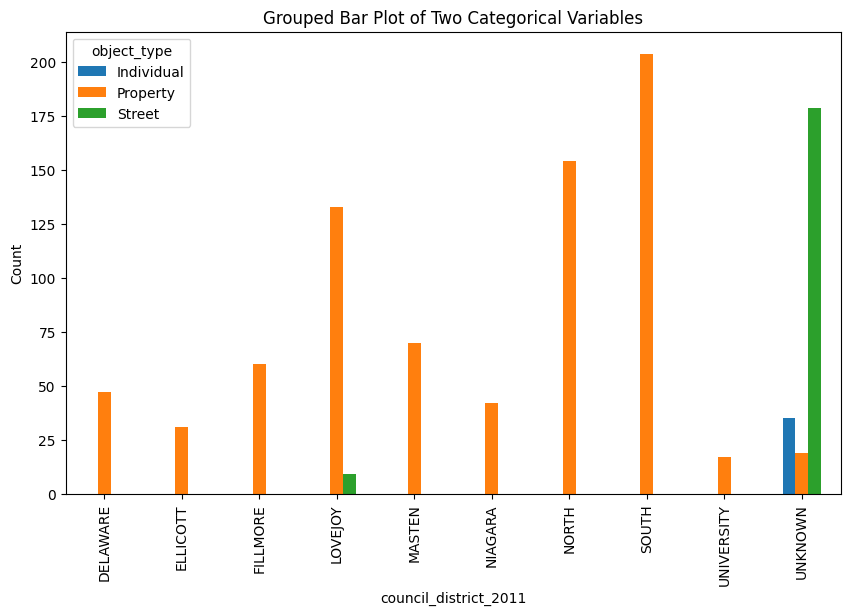

In [ ]:
grouped_data = df.groupby(['council_district_2011', 'object_type']).size().unstack(fill_value=0)

grouped_data.plot(kind='bar', figsize=(10, 6))

plt.xlabel('council_district_2011')
plt.ylabel('Count')
plt.title('Grouped Bar Plot')
plt.legend(title='object_type')
plt.show()


This grouped bar plot illustrates that most 311 phone calls with object types "individual" or "property" are categorized in the council district as "unknown", except for some values in Lovejoy. Additionally, the object type "properties" barely constitute the majority of the council districts, with very few of them classified as "unknown". In conclusion, this indicates that the majority of calls regarding are "individual" and "street" object types are labeled as unknown, while "property" object types are asummed to be correctly classified within the council district.

### Question:
- Do different districts and/or neighborhoods tend to different numbers of 311 calls?



Text(0.5, 1.0, 'Stacked Bar Plot')

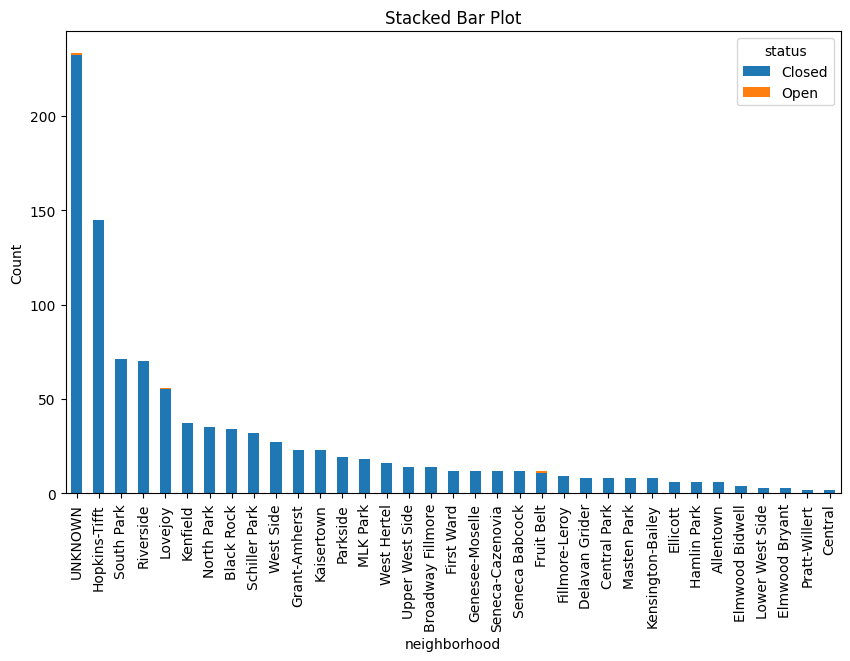

In [ ]:
grouped_data = df.groupby(['neighborhood', 'status']).size().unstack(fill_value=0)
grouped_data = grouped_data.loc[grouped_data.sum(axis=1).sort_values(ascending=False).index]
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('neighborhood')
plt.ylabel('Count')
plt.title('Stacked Bar Plot')

### Answer:
- It appears that Hopkins-Tifft, South Park, and Riverside have the highest number of 311 calls on aggerate

### Question:
- Do different months have different number of 311 reports?  
- What about different years?

Text(0.5, 1.0, 'Stacked Bar Plot')

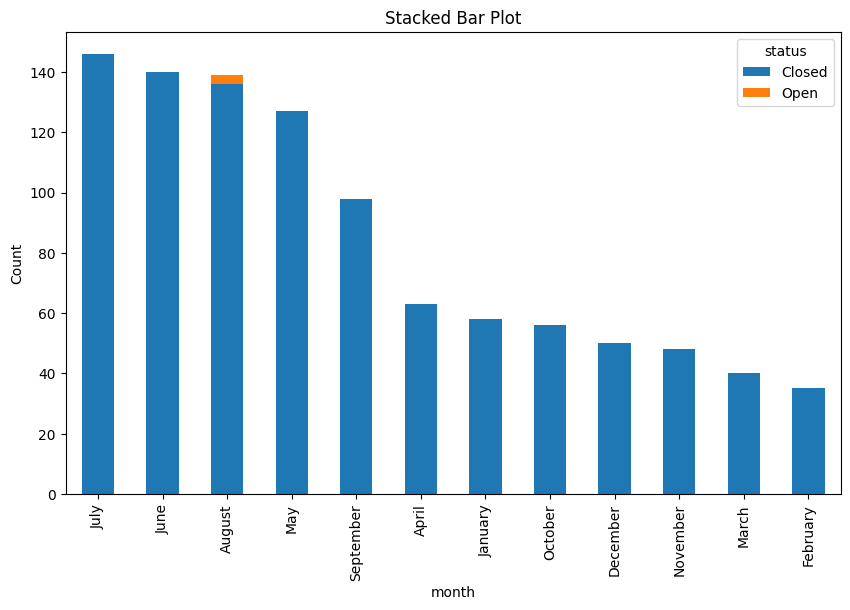

In [ ]:
df['month'] = df['open_date'].dt.month_name()

grouped_data = df.groupby(['month', 'status']).size().unstack(fill_value=0)
grouped_data = grouped_data.loc[grouped_data.sum(axis=1).sort_values(ascending=False).index]
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('month')
plt.ylabel('Count')
plt.title('Stacked Bar Plot')

Text(0.5, 1.0, 'Stacked Bar Plot')

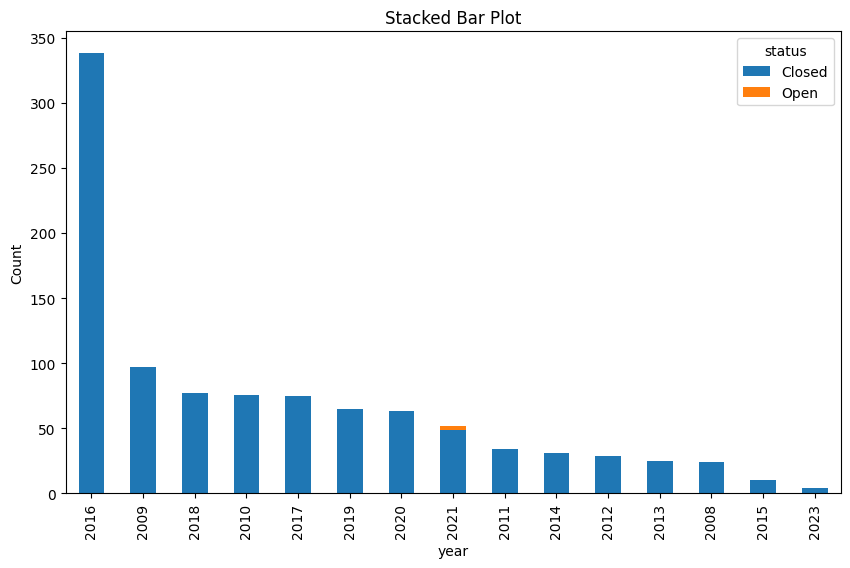

In [ ]:
df['year'] = df['open_date'].dt.year

grouped_data = df.groupby(['year', 'status']).size().unstack(fill_value=0)
grouped_data = grouped_data.loc[grouped_data.sum(axis=1).sort_values(ascending=False).index]
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('year')
plt.ylabel('Count')
plt.title('Stacked Bar Plot')

### Answer:
- It appears that the busiest months for 311 calls are July, followed by June, August, and May.
- It appears that the busiest years for 311 calls were 2016, 2009